# Management Half Year Report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import src.io_utils as io
from src.ecommerce import EcommerceAnalyzer 
import src.metrics as M
import src.viz as V  

In [2]:
df = io.df
df_clean = EcommerceAnalyzer(df).clean_df()
df_clean_month = EcommerceAnalyzer(df_clean).add_month()


In [3]:
by_category = M.revenue_per_category(df_clean)

In [4]:
M.total_units(df_clean)

np.int64(7463)

In [5]:
Top3_cat = M.top_categories(df_clean, n=3)

In [6]:
print(f"Average order value, AOV: {M.aov(df_clean):.0f}, Standardavvikelse: {M.aov_varians(df_clean):.0f}")

Average order value, AOV: 1401, Standardavvikelse: 1167


In [7]:
M.revenue_per_city(df_clean)

,city,total_intäkt
0,Göteborg,859019.65
1,Malmö,567926.32
2,Stockholm,1227201.94
3,Uppsala,551478.42
4,Västerås,297140.90


In [8]:
by_month = M.change_over_time(df_clean_month)

c:\Users\elin_\Desktop\Gruppuppgift\src\viz.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = (df.groupby("category", dropna=False)


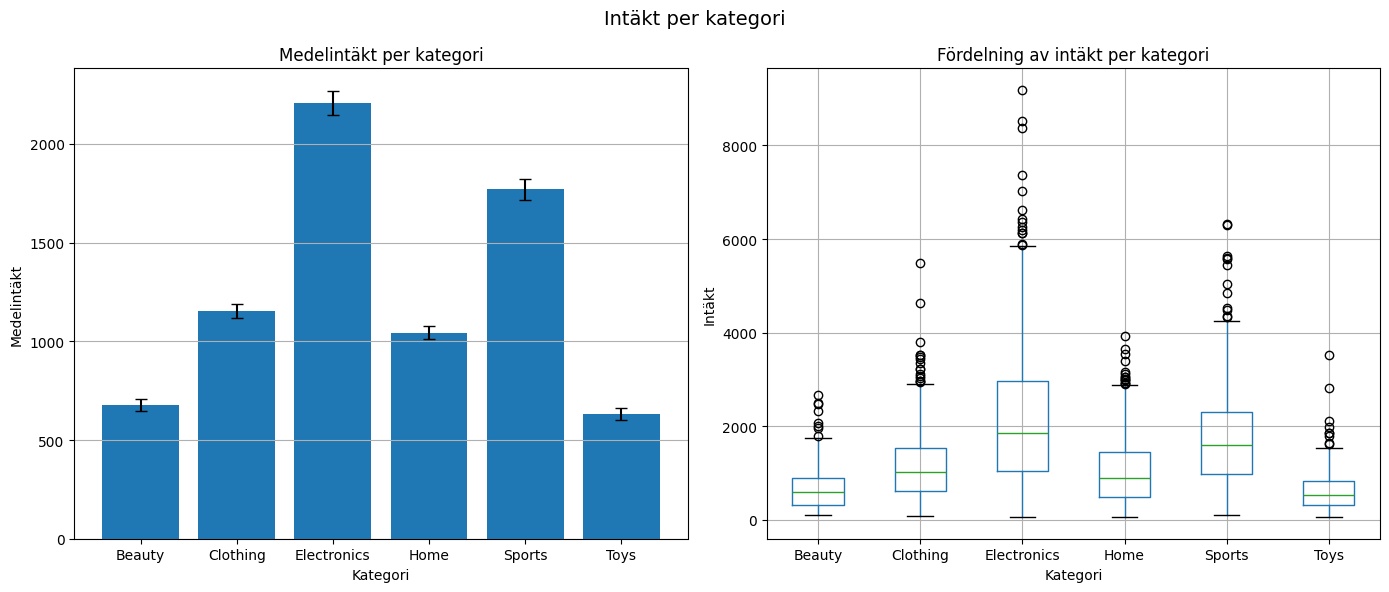

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
V.bar_top_categories(df_clean, ax=axes[0])
V.boxplot_revenue_by_category(df_clean, ax=axes[1])
fig.suptitle("Intäkt per kategori", fontsize =14)
plt.tight_layout()
plt.show()


c:\Users\elin_\Desktop\Gruppuppgift\src\viz.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = (df.groupby("city", dropna=False)


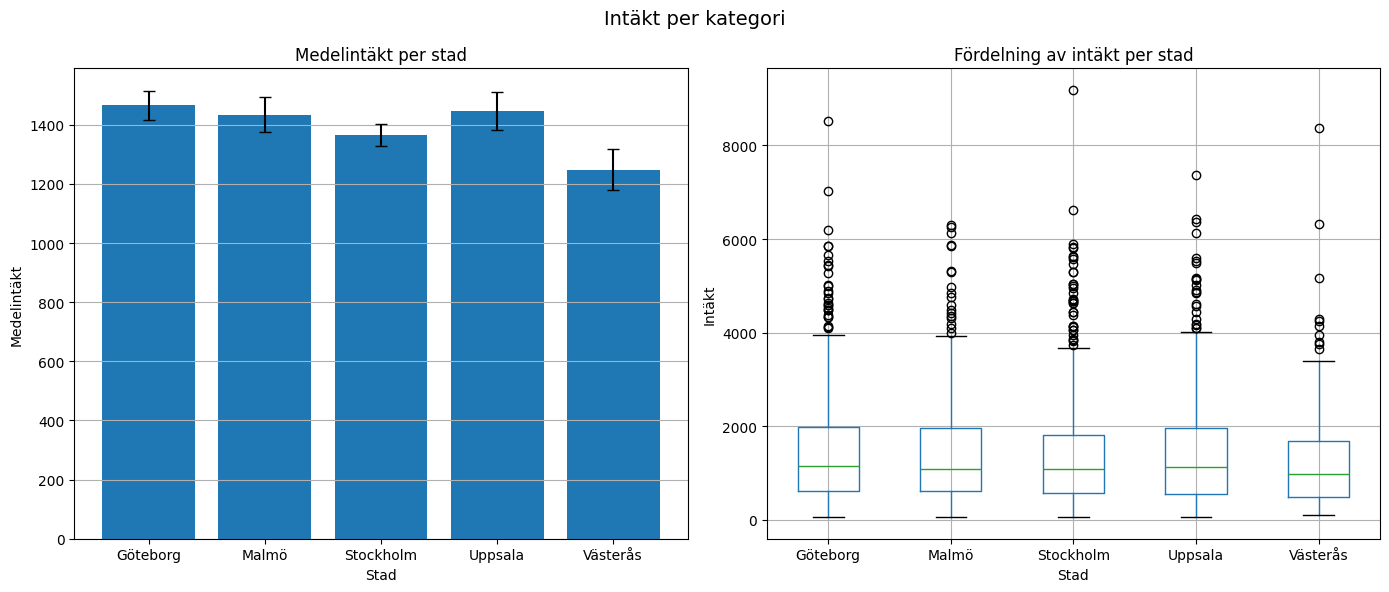

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
V.revenue_by_city(df_clean, ax=axes[0])
V.boxplot_revenue_by_city(df_clean, ax=axes[1])
fig.suptitle("Intäkt per kategori", fontsize =14)
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Intäkt per månad'}, xlabel='Månad', ylabel='Intäkt'>

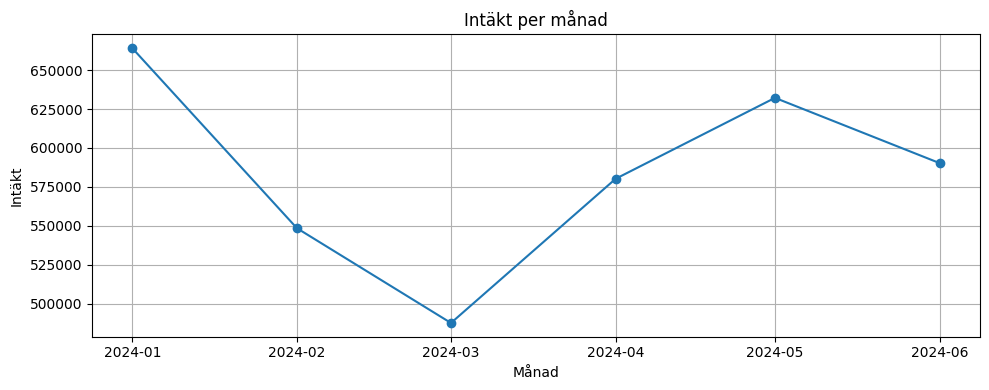

In [14]:
fig, ax = plt.subplots(figsize=(10, 4))
V.line(ax, by_month["month"], by_month["revenue"], "Intäkt per månad", "Månad", "Intäkt", grid= True)

In [9]:
revenue_outliers, high_revenue_categories, high_revenue_cities = M.summarize_outliers(df_clean)
print("Rader med ovanlig revenue:")
display(revenue_outliers.head())

print("\nKategorier med ovanlig intäkt:")
if high_revenue_categories.empty:
    print ("Inga kategorier med ovanlig intäkt")
else:
    print(high_revenue_categories)
    
print("\nStäder med ovanlig intäkt:") 
if high_revenue_cities.empty:
    print ("Inga städer med ovanlig intäkt")
else:
    print(high_revenue_cities)

Rader med ovanlig revenue:


c:\Users\Lenovo\Gruppuppgift\src\metrics.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupper = df.groupby(grupp)[kolumn].sum()


,order_id,date,city,category,price,units,revenue
45,100045,2024-06-17,Västerås,Sports,1052.08,6,6312.48
53,100053,2024-05-18,Stockholm,Electronics,1033.02,4,4132.08
57,100057,2024-06-04,Malmö,Electronics,1393.58,3,4180.74
68,100068,2024-02-13,Göteborg,Electronics,1003.34,5,5016.70
72,100072,2024-02-26,Stockholm,Electronics,968.62,6,5811.72



Kategorier med ovanlig intäkt:
Inga kategorier med ovanlig intäkt

Städer med ovanlig intäkt:
Inga städer med ovanlig intäkt
